<a href="https://colab.research.google.com/github/tejaswi0310/Project/blob/main/Stock_price_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE LIBRARIES

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


importing the training set

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
dataset_train=pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Train.csv')


making the numpy array

In [16]:
training_set=dataset_train.iloc[:,1:2].values

Feature Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler
#normalised the dataset values between 0 and 1
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

60 timestemps means 60 previous financial days
and in one month we have approx 20 financial days 
i.e, 3 months

In [18]:
#x_train=input and y_train=output

that's the idea of using RNN it is memorising the trends of last 60 days and than it will predict the data

In [19]:
X_train = []
y_train = []
#we have total 1258 rows in our dataset
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])#training data of the last 60 days
    y_train.append(training_set_scaled[i, 0])#(t+1)th data corresponds to the test data which we have to predict
X_train, y_train = np.array(X_train), np.array(y_train)

batch_size=total no of stock prices from 2012 to 2016

time_step=total no of timesteps(ie 60)

input_dim=new input dimensions which could help in
getting good predictions


In [20]:
# Reshaping it to 3 dimensions int columns,time_steps and predictors
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

The reshape() function when called on an array takes one argument which is a tuple defining the new shape of the array. We cannot pass in any tuple of numbers; the reshape must evenly reorganize the data in the array.

X_train.shape[0]  corresponds to number of columns

X_train.shape[1]  corresponds to number of time_steps

---

1=number of predictors

we know that regression is about predicting continuous values and classification is about predicting categorical values

Building the RNN

In [21]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [22]:
# Initialising the RNN
regressor = Sequential()

we are choosing 50 neurons because we have very high dimensionality data and if we choose less neurons ie 4 to 5 neurons than it would be hard to predict the correct output

In [23]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))) #we still have this 3d structure
regressor.add(Dropout(0.2))

In [24]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))#return sequences is not there because we do not return any more sequence from here
regressor.add(Dropout(0.2))

In [25]:
# Adding the output layer
regressor.add(Dense(units = 1))

ephocs means no of iterations in which you we want the neuran network to give result

In [26]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [27]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 16s 159ms/step - loss: 0.0509
Epoch 2/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 6s 162ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0044
Epoch 7/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0052
Epoch 8/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 6s 159ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 6s 160ms/step - loss: 0.0046
Epoch 13/100

In [29]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

for horizontal concatenation we use axis=1 and for vertical concatenation we use axis=0

len(dataset_total) is the final index of the whole dataset and len(dataset_test) is 20.

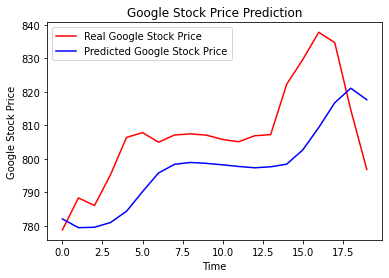

In [30]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):#for january month
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()